## 1. Load images and process color channels

In [90]:
from pathlib import Path
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [91]:
DATA_PATH = Path.cwd() / 'data' 
DATA_PATH

PosixPath('/home/astanea/code/image_processing/Image-Processing/data')

In [92]:
def get_random_img_path(data_path):
    return data_path / np.random.choice(os.listdir(data_path))

In [93]:
def get_images(path: str) -> np.ndarray:
    images = []
    for img in Path(path).glob('*.jpg'):
        img = cv2.imread(str(img))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return np.array(images)   

images = get_images(get_random_img_path(DATA_PATH).as_posix())
len(images)

2

In [94]:
def plot_images(images: np.ndarray):
    """Takes a list of images and plots them in a row, inside the same figure

    Args:
        images (np.ndarray): list containing images to be plotted as numpy arrays
    """
    num_images = len(images)
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

    # If there's only one row and one column, axes is not an array
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])

    # If there's only one row, axes is a 1D array
    elif rows == 1:
        axes = np.array([axes])

    for ax, img in zip(axes.ravel(), images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

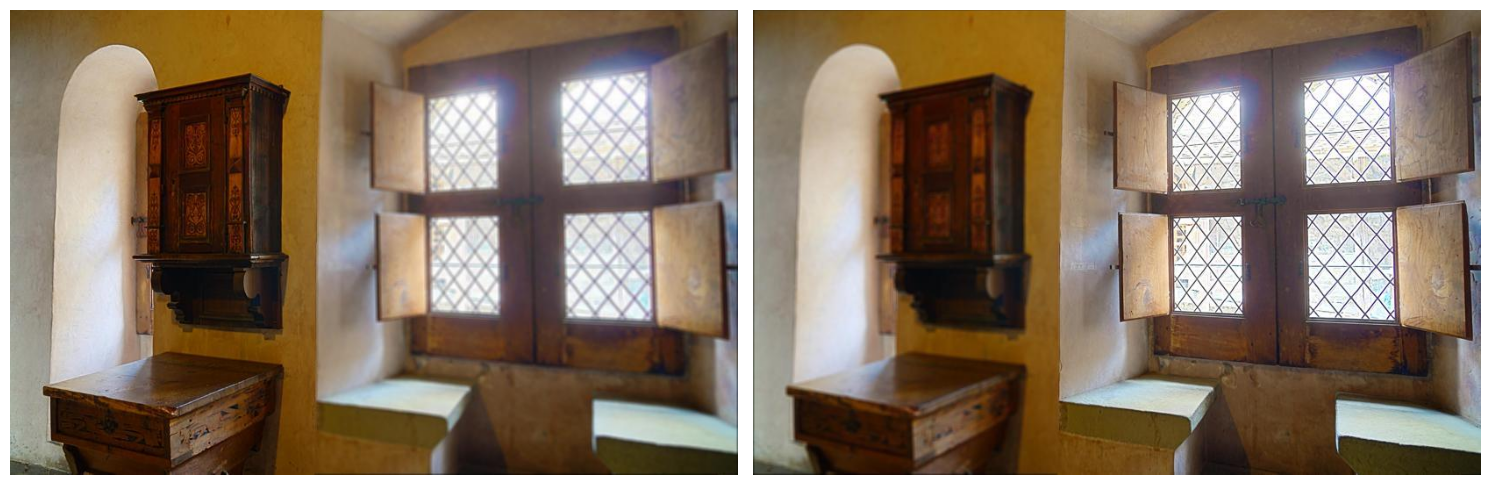

In [95]:
plot_images(images)

## 2. Implement convolution operation

- Create basic kernels
- Apply them using convolution operator into the loaded images
- 

In [96]:
class InvalidKernel(Exception):
    def __init__(self, message="Invalid kernel type"):
        self.message = message
        super().__init__(message)


class KernelFactory:
    @staticmethod
    def get_kernel(kernel_type):
        kernel = None
        if kernel_type == "edge_detection":
            kernel = np.array([[-1, -1, -1],
                               [-1,  8, -1],
                               [-1, -1, -1]],)
            
        if kernel_type == None:
            raise InvalidKernel()
        
        return kernel

In [97]:
kernel = KernelFactory.get_kernel("edge_detection")
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

References: 
- https://medium.com/@sabribarac/implementing-image-processing-kernels-from-scratch-using-convolution-in-python-4e966e9aafaf

In [98]:
def pad_image(img, padding):
    """Pads an image with zeros, given a padding size

    Args:
        img (np.ndarray): image to be padded
        padding (int): padding size

    Returns:
        np.ndarray: padded image
    """
    x_img_shape, y_img_shape, color_chn = img.shape[0], img.shape[1], img.shape[2]
    
    img_padded = np.zeros((x_img_shape + padding * 2, y_img_shape + padding * 2, color_chn)) 
    img_padded[padding:-padding, padding:-padding, :] = img
    return img_padded

In [99]:
def convolve2D(img: np.ndarray, kernel: np.ndarray, padding: int = 0, verbose=False):
    (R, G, B) = range(3)
    
    # Apply padding to all sides of the image if padding is not 0
    if padding != 0:
        img_padded = pad_image(img, padding)
    else:
        # not adding padding will result in a smaller output image
        img_padded = img
    
    out_img = np.zeros(img_padded.shape)
    
    x_img_shape, y_img_shape, color_chn = img_padded.shape
    x_kernel_shape, y_kernel_shape = kernel.shape

    
    # Create a new image of original img size minus the border
    # where the convolution can't be applied
    new_img = np.zeros((height - kernel_height + 1, width - kernel_width + 1, color_chn))

    # Loop through each pixel in the image
    # But skip the outer edges of the image
    for x in range(kernel_height // 2, height - kernel_height // 2 - 1):
        for y in range(kernel_width // 2, width - kernel_width // 2 - 1):
            # Extract a window of pixels around the current pixel
            # TODO: implement in the window portion of the loop the SGML convolution formula
            window = img_padded[
                x - kernel_height // 2 : x + kernel_height // 2 + 1,
                y - kernel_width // 2 : y + kernel_width // 2 + 1,
            ]

            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            new_img[x, y, 0] = int((window[:, :, R] * kernel).sum())
            new_img[x, y, 1] = int((window[:, :, G] * kernel).sum())
            new_img[x, y, 2] = int((window[:, :, B] * kernel).sum())

    # Clip values to the range 0-255
    new_img = np.clip(new_img, 0, 255)
    return new_img.astype(np.uint8)

In [100]:
img1, img2 = images[0], images[1]
img1.shape, img2.shape

((531, 830, 3), (531, 830, 3))

In [101]:
img1_convolved = convolve2D(img1, kernel, padding=4)
img2_convolved = convolve2D(img2, kernel)

0 1 2
531 830


0 1 2
531 830


In [102]:
img1_convolved.shape, img2_convolved.shape

((529, 828, 3), (529, 828, 3))

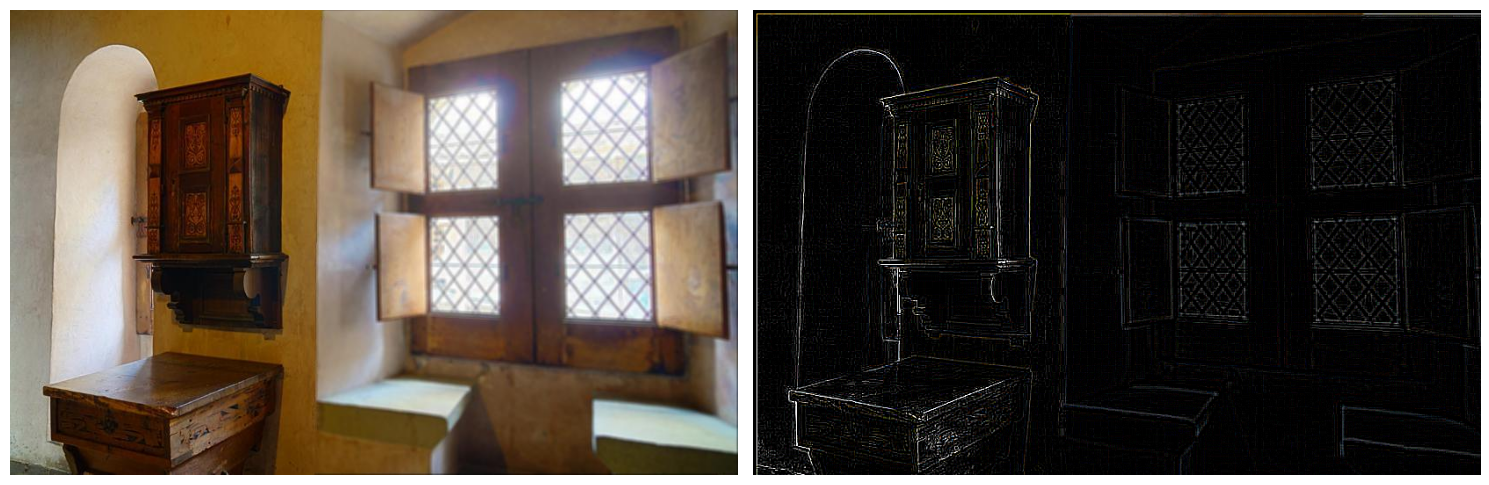

In [103]:
plot_images([img1, img1_convolved])